In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
train = pd.read_csv("data/second_innings_data.csv")
train = train.drop("Unnamed: 0",axis=1)

In [40]:
train.head()

,uid,odi_type,team,opposition,toss_won,bat_second_win_prob,is_home,balls_total,stadium_id,runs,...,current_balls_per_wicket,req_runs_per_wicket,current_runs_per_wicket,req_run_rate,current_run_rate,year,all_out_flag,target_deviation_from_avg_inning_1,target_deviation_from_avg_inning_2,win_percentage
0,3705,daynight,England,South-Africa,0,0.348837,0,300,174,203,...,30.000000,20.400000,20.300000,4.080000,4.060000,2000,0,-31,16,0
1,3704,day,England,South-Africa,0,0.516129,0,237,949,185,...,118.500000,92.000000,92.500000,3.692308,4.683544,2000,0,-55,-12,1
2,3711,daynight,England,South-Africa,1,0.604651,0,228,508,111,...,20.727273,13.545455,10.090909,3.311111,2.921053,2000,1,-87,-57,0
3,3709,daynight,South-Africa,England,1,0.545455,1,298,931,233,...,33.111111,25.666667,25.888889,4.620000,4.691275,2000,0,6,37,1
4,3886,day,England,West-Indies,1,0.510204,1,299,34,192,...,27.181818,17.727273,17.454545,3.900000,3.852843,2000,1,-59,-27,0


In [41]:
train.isnull().sum()

uid                                   0
odi_type                              0
team                                  0
opposition                            0
toss_won                              0
bat_second_win_prob                   0
is_home                               0
balls_total                           0
stadium_id                            0
runs                                  0
target                                0
req_balls_per_wicket                  0
current_balls_per_wicket              0
req_runs_per_wicket                   0
current_runs_per_wicket               0
req_run_rate                          0
current_run_rate                      0
year                                  0
all_out_flag                          0
target_deviation_from_avg_inning_1    0
target_deviation_from_avg_inning_2    0
win_percentage                        0
dtype: int64

In [42]:
train.columns

Index(['uid', 'odi_type', 'team', 'opposition', 'toss_won',
       'bat_second_win_prob', 'is_home', 'balls_total', 'stadium_id', 'runs',
       'target', 'req_balls_per_wicket', 'current_balls_per_wicket',
       'req_runs_per_wicket', 'current_runs_per_wicket', 'req_run_rate',
       'current_run_rate', 'year', 'all_out_flag',
       'target_deviation_from_avg_inning_1',
       'target_deviation_from_avg_inning_2', 'win_percentage'],
      dtype='object')

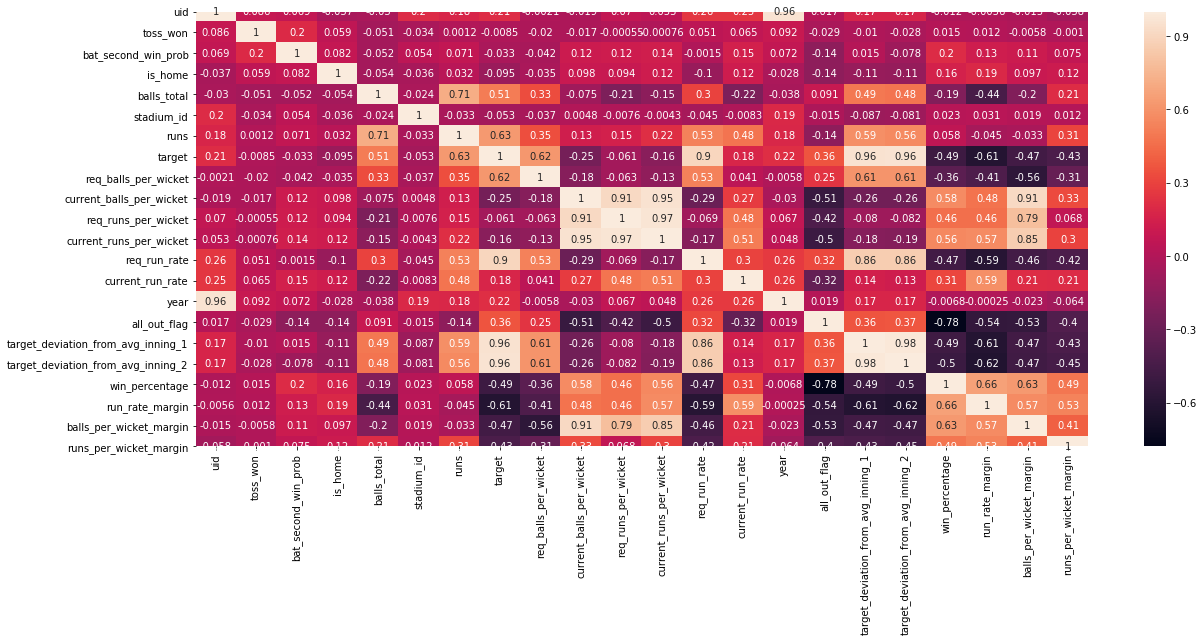

In [56]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(),annot=True,fmt='.2g')

In [55]:
train['run_rate_margin'] = train['current_run_rate'] - train['req_run_rate']
train['balls_per_wicket_margin'] = train['current_balls_per_wicket'] - train['req_balls_per_wicket']
train['runs_per_wicket_margin'] = train['current_runs_per_wicket'] - train['req_runs_per_wicket']

In [57]:
train['binned_target'] = pd.cut(train['target'],bins=[0,200,250,300,1000],
                              labels=['less_than_200','200_to_250','250_to_300','more_than_300'])

In [58]:
train.head()

,uid,odi_type,team,opposition,toss_won,bat_second_win_prob,is_home,balls_total,stadium_id,runs,...,current_run_rate,year,all_out_flag,target_deviation_from_avg_inning_1,target_deviation_from_avg_inning_2,win_percentage,run_rate_margin,balls_per_wicket_margin,runs_per_wicket_margin,binned_target
0,3705,daynight,England,South-Africa,0,0.348837,0,300,174,203,...,4.060000,2000,0,-31,16,0,-0.020000,-7.500000,-0.100000,200_to_250
1,3704,day,England,South-Africa,0,0.516129,0,237,949,185,...,4.683544,2000,0,-55,-12,1,0.991237,91.318182,0.500000,less_than_200
2,3711,daynight,England,South-Africa,1,0.604651,0,228,508,111,...,2.921053,2000,1,-87,-57,0,-0.390058,-3.818182,-3.454545,less_than_200
3,3709,daynight,South-Africa,England,1,0.545455,1,298,931,233,...,4.691275,2000,0,6,37,1,0.071275,-9.746032,0.222222,200_to_250
4,3886,day,England,West-Indies,1,0.510204,1,299,34,192,...,3.852843,2000,1,-59,-27,0,-0.047157,-2.818182,-0.272727,less_than_200


In [59]:
train = pd.get_dummies(data=train,columns=['odi_type','team','opposition','binned_target'])

In [46]:
train.columns

Index(['uid', 'toss_won', 'bat_second_win_prob', 'is_home', 'balls_total',
       'stadium_id', 'runs', 'target', 'req_balls_per_wicket',
       'current_balls_per_wicket', 'req_runs_per_wicket',
       'current_runs_per_wicket', 'req_run_rate', 'current_run_rate', 'year',
       'all_out_flag', 'target_deviation_from_avg_inning_1',
       'target_deviation_from_avg_inning_2', 'win_percentage',
       'run_rate_margin', 'balls_per_wicket_margin', 'runs_per_wicket_margin',
       'odi_type_day', 'odi_type_daynight', 'odi_type_night', 'team_Australia',
       'team_Bangladesh', 'team_England', 'team_India', 'team_New-Zealand',
       'team_Pakistan', 'team_South-Africa', 'team_Sri-Lanka',
       'team_West-Indies', 'opposition_Australia', 'opposition_Bangladesh',
       'opposition_England', 'opposition_India', 'opposition_New-Zealand',
       'opposition_Pakistan', 'opposition_South-Africa',
       'opposition_Sri-Lanka', 'opposition_West-Indies',
       'binned_target_less_than_200', '

In [60]:
train = train.drop(['uid','stadium_id','runs','target','req_balls_per_wicket','current_balls_per_wicket','req_runs_per_wicket',
                   'current_runs_per_wicket','req_run_rate','current_run_rate','year'],axis=1)

In [61]:
x_train = train.drop(['win_percentage'],axis=1)
y_train = train['win_percentage']

In [62]:
x_train.shape, y_train.shape

((1717, 35), (1717,))

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=3000,multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
x_train.columns

Index(['toss_won', 'bat_second_win_prob', 'is_home', 'balls_total',
       'all_out_flag', 'target_deviation_from_avg_inning_1',
       'target_deviation_from_avg_inning_2', 'run_rate_margin',
       'balls_per_wicket_margin', 'runs_per_wicket_margin', 'odi_type_day',
       'odi_type_daynight', 'odi_type_night', 'team_Australia',
       'team_Bangladesh', 'team_England', 'team_India', 'team_New-Zealand',
       'team_Pakistan', 'team_South-Africa', 'team_Sri-Lanka',
       'team_West-Indies', 'opposition_Australia', 'opposition_Bangladesh',
       'opposition_England', 'opposition_India', 'opposition_New-Zealand',
       'opposition_Pakistan', 'opposition_South-Africa',
       'opposition_Sri-Lanka', 'opposition_West-Indies',
       'binned_target_less_than_200', 'binned_target_200_to_250',
       'binned_target_250_to_300', 'binned_target_more_than_300'],
      dtype='object')

In [72]:
test = pd.DataFrame(columns=x_train.columns)
test.at[0,'toss_won'] = 1
test.at[0,'bat_second_win_prob'] = 0.5
test.at[0,'is_home'] = 1
test.at[0,'balls_total'] = 297
test.at[0,'all_out_flag'] = 1
test.at[0,'target_deviation_from_avg_inning_1'] = -7
test.at[0,'target_deviation_from_avg_inning_2'] = 63
test.at[0,'run_rate_margin'] = -0.2
test.at[0,'balls_per_wicket_margin'] = 23.73
test.at[0,'runs_per_wicket_margin'] = 23
test.at[0,'odi_type_day'] = 0
test.at[0,'odi_type_daynight'] = 1
test.at[0,'odi_type_night'] = 0
test.at[0,'team_Australia'] = 1
test.at[0,'team_Bangladesh'] = 0
test.at[0,'team_England'] = 0
test.at[0,'team_India'] = 0
test.at[0,'team_New-Zealand'] = 0
test.at[0,'team_Pakistan'] = 0
test.at[0,'team_South-Africa'] = 0
test.at[0,'team_Sri-Lanka'] = 0
test.at[0,'team_West-Indies'] = 0
test.at[0,'opposition_Australia'] = 0
test.at[0,'opposition_Bangladesh'] = 0
test.at[0,'opposition_England'] = 0
test.at[0,'opposition_India'] = 1
test.at[0,'opposition_New-Zealand'] = 0
test.at[0,'opposition_Pakistan'] = 0
test.at[0,'opposition_South-Africa'] = 0
test.at[0,'opposition_Sri-Lanka'] = 0
test.at[0,'opposition_West-Indies'] = 0
test.at[0,'binned_target_less_than_200'] = 0
test.at[0,'binned_target_200_to_250'] = 0
test.at[0,'binned_target_250_to_300'] = 0
test.at[0,'binned_target_more_than_300'] = 1

In [73]:
y = model.predict_proba(test)

In [74]:
y

array([[0.9507714, 0.0492286]])

In [75]:
import pickle
pickle.dump(model,open('models/second_innings_predictor.pkl','wb'))